In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
import sklearn #Для стандартизации
from sklearn import preprocessing

In [2]:
df = pd.read_excel(r'C:\Users\Mln\jupyter-lab\random_test\mindset\task\Задача.xlsx')

print(df.head())

   Персона  Возраст, лет  Стаж вождения, лет  Убыточность, %  \
0  6-LLJEH            20                   1             263   
1  2-GLHFG            74                  51             107   
2  6-FJFKL            27                   1             165   
3  4-KJEJL            24                   6             348   
4  5-JFFGH            26                   3             286   

   Уровень заработной платы, руб/год  
0                             716693  
1                             274393  
2                             723841  
3                             139419  
4                             650003  


In [3]:
df = df.drop(['Персона'], axis=1) # удаляю признаки которые не буду рассматривать

## Шкалировка
Здесь меня будет интересовать взаимосвязть убыточности и уровня заработной платы, но на этапе обучения проверю выборку на разных количественных данных. Из обработки ограничусь стандартизацией.

In [4]:
df_scal = df.copy()
col = ['Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %', 'Уровень заработной платы, руб/год'] # отбираю количественные признаки

features = df_scal[col] # df только с колич. признаками

scaler = QuantileTransformer(n_quantiles=10, random_state=42).fit(features.values) # вызываем и обучаю шкалировщик
features = scaler.transform(features.values) # преобразуем датафрейм с колич. признаками

df_scal[col] = features # возращаю наши данные в исходный датафрейм

## Model building
Сначала запущу кластеризацию на базовых настройках, произвольно выбрав кластеры. Чаще всего используют 4-5 кластеров. Только после этого начну диагностику модели.

In [5]:
df_k = df_scal.copy()

In [6]:
x = df_k[['Убыточность, %', 'Уровень заработной платы, руб/год']]

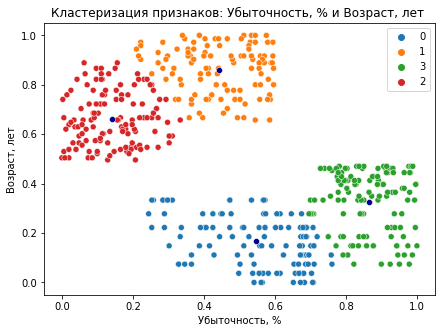

None


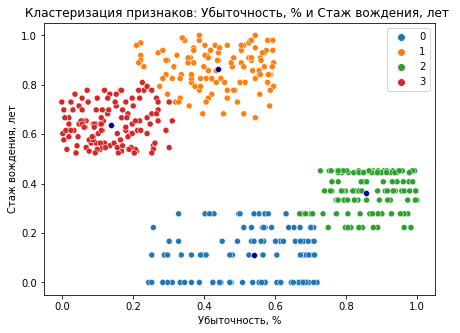

None


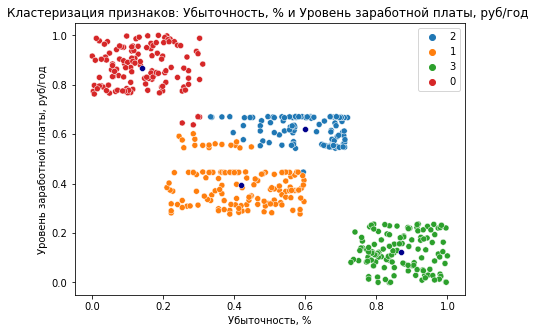

None


In [7]:
def cluster_plot(column_name):
    fig, ax = plt.subplots(figsize=(7, 5))
    
    kmeans = KMeans(n_clusters=4, init='k-means++')
    kmeans.fit(df_k[['Убыточность, %', column_name]]) # тренирую модель

    y_kmeans = kmeans.predict(df_k[['Убыточность, %', column_name]]) # предсказываем классы

    df_k['labels'] = kmeans.labels_.astype(str) # добав. в данные указание на классы для каждого наблюдения

    sns.scatterplot(x = df_k['Убыточность, %'], y = df_k[column_name], data=df_k, hue=df_k['labels']) # строю график с классами

    centers = kmeans.cluster_centers_
    sns.scatterplot(x = centers[:, 0], y = centers[:, 1], color='darkblue') # добавляю на график центроиды
    
    plt.title('Кластеризация признаков: Убыточность, % и {} '.format(column_name))
    plt.show()
    
    
for i in  ('Возраст, лет', 'Стаж вождения, лет', 'Уровень заработной платы, руб/год'):
    print(cluster_plot(i))

**В последнем примере точки расположились так, что точки, отнесенные к одному и тому же кластеру, находятся как можно ближе друг к другу и они как можно более похожи, а точки из других разных кластеров распологаются как можно дальше друг от друга и как можно менее похожи. Вижу, что кластеры "0" и "3" очень близко распологаются друг к другу, поэтому дальше я буду использовать три кластера для модели.**

In [8]:
model = KMeans(n_clusters=3, init='k-means++')
model.fit(x)

y_predicted = model.fit_predict(x) # предсказываю значения

df_k['cluster'] = y_predicted #добовляю новую колонку в датафрейм
df_k

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",labels,cluster
0,0.000000,0.000000,0.683386,0.645358,2,1
1,0.930556,0.929293,0.271111,0.445600,1,1
2,0.277778,0.000000,0.476703,0.654409,2,1
3,0.148148,0.333333,0.772205,0.082716,3,2
4,0.222222,0.166667,0.707419,0.560917,2,1
...,...,...,...,...,...,...
479,0.800000,0.641026,0.248889,0.958394,0,0
480,0.800000,0.841270,0.559259,0.343090,1,1
481,0.000000,0.277778,0.706374,0.548558,2,1
482,0.564815,0.746032,0.129129,0.955727,0,0


In [9]:
df_k['cluster'] = df_k['cluster'].astype(object) #change the data type
df_k

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",labels,cluster
0,0.000000,0.000000,0.683386,0.645358,2,1
1,0.930556,0.929293,0.271111,0.445600,1,1
2,0.277778,0.000000,0.476703,0.654409,2,1
3,0.148148,0.333333,0.772205,0.082716,3,2
4,0.222222,0.166667,0.707419,0.560917,2,1
...,...,...,...,...,...,...
479,0.800000,0.641026,0.248889,0.958394,0,0
480,0.800000,0.841270,0.559259,0.343090,1,1
481,0.000000,0.277778,0.706374,0.548558,2,1
482,0.564815,0.746032,0.129129,0.955727,0,0


In [10]:
df_k['cluster'].unique()

array([1, 2, 0], dtype=object)

In [11]:
X = x.values

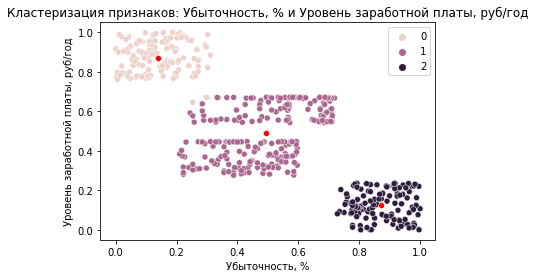

In [12]:
sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,1], data=df_k, hue=df_k['cluster']) # строю график с классами

sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], color='red') # добавляю на график центроиды

plt.title('Кластеризация признаков: Убыточность, % и Уровень заработной платы, руб/год'.format(x))

plt.legend()
plt.show()

## Оценка модели

In [13]:
from sklearn.metrics import silhouette_score

target = model.labels_ # смотрим классы для наших данных

silhouette_score(x, target) # оценка плотности классов

0.6124039909758532

**Плотность должна быть от -1 до 1. Данные хорошо разделены, если значение близко к 1.**

In [14]:
output = pd.DataFrame(data=y_predicted) # создаю датафрейм с предсказанными классами
output[0].value_counts(ascending=False) #количество наблюдений в каждом классе

1    238
0    125
2    121
Name: 0, dtype: int64

## Диагностика модели
Главная проблема метода кластеризации - это определение количества классов. Подобрать такое количетсво можно с помощью графика локтя.

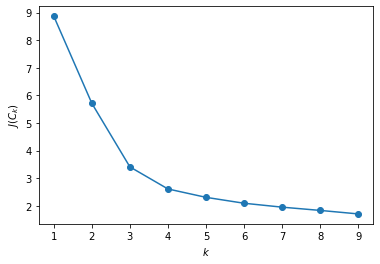

In [15]:
inertia = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k, random_state=42).fit(x)
    inertia.append(np.sqrt(k_means.inertia_))

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Далее я перехожу к данным до шкалировки. Шкалировка нужна для обучения модели, но понимать такие данные затруднительно. Поэтому возвращемся к исходному формату данных, но с учетом полученных групп.

In [16]:
df_l = df
df_l['Кластер'] = model.labels_.astype(object)
df_l.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",Кластер
0,20,1,263,716693,1
1,74,51,107,274393,1
2,27,1,165,723841,1
3,24,6,348,139419,2
4,26,3,286,650003,1


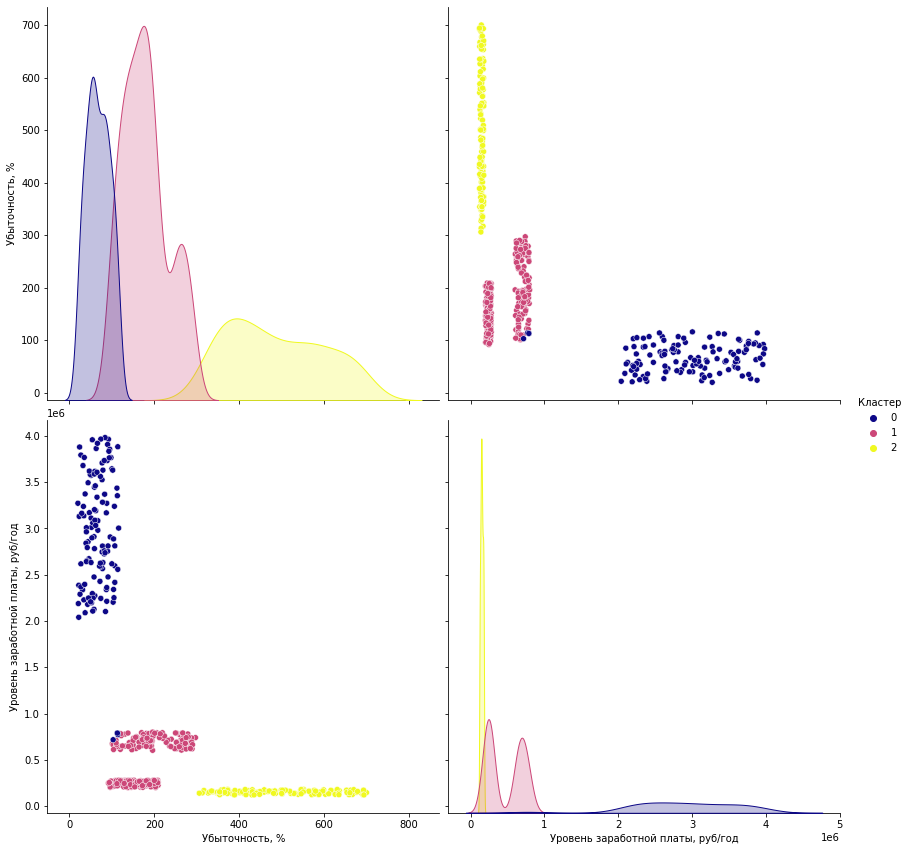

In [17]:
sns.set_palette('plasma')
sns.pairplot(df_l, hue='Кластер', diag_kind='kde', vars=['Убыточность, %', 'Уровень заработной платы, руб/год'],
             palette='plasma', height=6)

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # убираем в выводе экспоненту
df_l.groupby('Кластер')[['Убыточность, %', 'Уровень заработной платы, руб/год']].mean()

,"Убыточность, %","Уровень заработной платы, руб/год"
Кластер,,
0,67.192,2907951.656
1,178.828,466744.504
2,487.140,149461.620


На основе предложенных данных видно, что убыточность зависит от уровня заработной платы в год. 
Чем выше уровень заработной платы, тем меньше показатель убыточности и наоборот, чем ниже зарплата у персоны, тем выше показатель убыточности. 

Данные разбиты на три группы: 
1. Люди в высоким годовым доходом (0 кластер)
2. Люди с средним годовым доходом (1 кластер)
3. Люди с низким годовым доходом (2 кластер)

Первая группа - люди с высоким годовым доходом, средняя убыточность в этом кластере составляет 67.192%, а среднее число годовой запралаты 2907951.656 рублей. 
Предполагаю, что люди с высоким годовым доходом проводят меньше времени на дорогах общего пользования, поэтому этот кластер обладает самым низким показателем убыточности.

Вторая группа - люди со средним годовым доходом, средняя убыточность в этом кластере составляет 178.828%, а среднее число годовой запралаты 466744.504 рублей, что почти в два раза больше годовой зарплаты людей из третьего кластера.

Третья группа - люди с низким годовым доходом, средняя убыточность в этом кластере составляет 487.140%, а среднее число годовой запралаты 149461.620 рублей. 
Могу предположить почему люди с низким годовым доходом имеют высокие показатели убыточности. Допустим, рассмотрим водителя курьера или же водителя маршрутных транспротных средств, при такой работе: частое взаимодействие с авто или другим видом транспортного средства, возрастает значение риска попасть в ДТП, скорее всего это и проявляется в высоком показателе убыточности.


In [25]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))